In [2]:
import requests

url = "https://api.archives-ouvertes.fr/search/?q=language_s:fr&fl=authFullName_s&rows=1000"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    docs = data.get('response', {}).get('docs', [])
    
    collaborations = sum(1 for d in docs if isinstance(d.get("authFullName_s"), list) and len(d["authFullName_s"]) > 1)
    
    print(f"Nombre de collaborations détectées (co-auteurs sur les 1000 premières publications) : {collaborations}")
else:
    print("Erreur lors de la récupération des données.")


Nombre de collaborations détectées (co-auteurs sur les 1000 premières publications) : 255


In [1]:
import pandas as pd
df = pd.read_csv("nombre_collaborations.csv")
print("Données chargées avec succès !")
display(df.head())

Données chargées avec succès !


annee      pays             institution type_collaboration  \
0   2023    France                    CNRS     co-auteurs HAL   
1   2023    Canada  Université de Montréal     co-auteurs HAL   
2   2023  Belgique                     ULB     co-auteurs HAL   
3   2023    Suisse                    EPFL     co-auteurs HAL   
4   2023    Canada  Université de Montréal     co-auteurs HAL   

   nombre_publications  
0                  672  
1                  450  
2                  320  
3                  280  
4                  450

In [2]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
print(df.isnull().sum())

# Supprimer les doublons
df = df.drop_duplicates()

Valeurs manquantes :
annee                  0
pays                   0
institution            0
type_collaboration     0
nombre_publications    0
dtype: int64


/home/hicham/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Figure size 720x360 with 0 Axes>

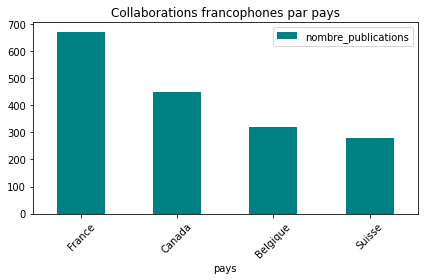

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df.plot(kind='bar', x='pays', y='nombre_publications', color='teal')
plt.title("Collaborations francophones par pays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("docs/collaborations.png")  # Sauvegarde dans le dossier docs
plt.show()

In [4]:
import plotly.express as px
fig = px.bar(df,
             x='pays',
             y='nombre_publications',
             color='institution',
             title='Détail des collaborations')
fig.write_html("docs/collaborations_interactif.html")
fig.show()